In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split

In [ ]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/sashutosh/DeepLearning/master/Data/Results_clean_v2.csv")
raw_data

,timeStamp,averageExecutionTime,medianOfFlowDuration,maxFlowDuration,flowDurationList,avgCpuByProcess,medianOfCpuByProcess,maxCpuByProcess,cpuByProcessList,avgDiskByProcess,medianOfDiskByProcess,maxDiskByProcess,diskByProcessList,avgMemByProcess,medianOfMemByProcess,maxMemByProcess,memByProcessList,percentageHeap,medianOfHeap,maxHeap,percentHeapList,percentageWorkerThreads,medianOfWorkerThreads,maxWorkerThreads,percentWorkerThreadsList,avgInBufferSize,medianOfInBuffer,maxInBuffer,inBufferSizeList,percentageOutBuffer,medianOfOutBuffer,maxOutBuffer,percentOutBufferList,avgSystemCpuJmx,medianOfSystemCpu,maxSystemCpu,systemCpuJmxList
0,Jan 10-- 2021 9:15:32 AM,12966.0,13078,14719,14719;13078;13672;12126;11235;,0.112635,0.124,0.170,0.1092260856108677;0.12353175828438517;0.15970...,3.230190e+08,3.230000e+08,323020917,323020917;323019354;323018833;323018312;323017...,52.0,52.0,52,52.0;52.0;52.0;52.0;52.0;,0.184841,0.224,0.325,0.2554077362030569;0.3245863434169461;0.095981...,2.000000,2.0,2,2.0;2.0;2.0;2.0;2.0;,0.000000,0.0,0,0;0;0;0;0;,1.245333,2.027,2.107,0.02666666666666667;2.106666666666667;2.026666...,0.113167,0.119,0.175,0.10934549395867632;0.11894290098652129;0.1608...
1,Jan 10-- 2021 10:00:16 AM,12150.6,11829,13391,13266;11829;10532;13391;11735;,0.111258,0.138,0.158,0.10703425759446372;0.13787605655030938;0.1528...,3.230241e+08,3.230000e+08,323025606,323025606;323024564;323024043;323023522;323023...,52.0,52.0,52,52.0;52.0;52.0;52.0;52.0;,0.196522,0.168,0.342,0.1683658401249434;0.2133725508438494;0.103132...,2.000000,2.0,2,2.0;2.0;2.0;2.0;2.0;,0.000000,0.0,0,0;0;0;0;0;,1.658667,2.027,4.040,0.05333333333333334;0.06666666666666667;4.04;2...,0.110290,0.137,0.160,0.11640956064683629;0.13676235709501172;0.1596...
2,Jan 10-- 2021 10:01:55 AM,13150.4,13845,14594,14594;13845;14360;13250;9703;,0.173955,0.208,0.222,0.18856740664698599;0.22046478079850015;0.2083...,3.230295e+08,3.230000e+08,323030816,323030816;323030295;323029253;323028732;323028...,52.0,52.0,52,52.0;52.0;52.0;52.0;52.0;,0.169525,0.178,0.339,0.17836349632339468;0.33850935520957354;0.2058...,3.000000,3.0,3,3.0;3.0;3.0;3.0;3.0;,0.200000,0.0,1,1;0;0;0;0;,1.274667,0.107,4.040,0.10666666666666667;4.04;0.09333333333333334;0...,0.176758,0.210,0.228,0.1985885535090306;0.2164285809390769;0.210024...
3,Jan 10-- 2021 10:03:56 AM,13566.0,13610,14188,13610;14188;12844;13391;13797;,0.234493,0.261,0.308,0.3084422506340378;0.23552775902134276;0.26140...,3.230350e+08,3.230000e+08,323036547,323036547;323036026;323035505;323034984;323034...,52.0,52.0,52,52.0;52.0;52.0;52.0;52.0;52.0;52.0;,0.201747,0.239,0.321,0.28046812213182537;0.06476824013161088;0.1540...,4.285714,4.0,6,4.0;6.0;4.0;4.0;4.0;4.0;4.0;,0.000000,0.0,0,0;0;0;0;0;0;0;,0.840000,0.267,3.027,0.26666666666666666;0.26666666666666666;3.0266...,0.234362,0.257,0.308,0.3084400480316922;0.23597092805271735;0.25705...
4,Jan 10-- 2021 10:05:52 AM,13694.4,13438,14828,14518;12985;13438;14828;12703;,0.257938,0.295,0.314,0.293011262335781;0.2705949019938888;0.3140254...,3.230411e+08,3.230000e+08,323042799,323042799;323042278;323041236;323040715;323040...,52.0,52.0,52,52.0;52.0;52.0;52.0;52.0;52.0;,0.211632,0.222,0.345,0.31847118623185866;0.15339040756225586;0.2906...,5.000000,5.0,5,5.0;5.0;5.0;5.0;5.0;5.0;,0.000000,0.0,0,0;0;0;0;0;0;,1.075556,0.100,4.067,0.05333333333333334;0.10666666666666667;0.0933...,0.260198,0.302,0.319,0.30259890338475426;0.27025738379102726;0.3039...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Jan 26-- 2021 5:13:16 AM,23613.8,22689,27845,27845;24470;20892;22173;22689;,0.558756,0.618,0.683,0.6361258801737352;0.6825222787998959;0.634629...,1.760265e+09,1.760000e+09,1761229423,1761229423;1760402448;1760237053;1760071658;17...,54.0,54.0,54,54.0;54.0;54.0;54.0;54.0;54.0;,0.391196,0.329,0.837,0.8369598614538878;0.45946660604620165;0.28641...,47.333333,47.0,48,47.0;47.0;47.0;47.0;48.0;48.0;,1.833333,0.0,11,0;0;0;11;0;

In [ ]:
#Removing all list data
ras_metrics=raw_data[['averageExecutionTime','avgCpuByProcess','medianOfCpuByProcess','maxCpuByProcess','avgDiskByProcess','medianOfDiskByProcess','maxDiskByProcess','avgMemByProcess','medianOfMemByProcess','maxMemByProcess','percentageHeap','medianOfHeap','maxHeap','percentageWorkerThreads','medianOfWorkerThreads','maxWorkerThreads','avgInBufferSize','medianOfInBuffer','maxInBuffer','percentageOutBuffer','medianOfOutBuffer','maxOutBuffer','avgSystemCpuJmx','medianOfSystemCpu','maxSystemCpu']]
ras_metrics.describe()


,averageExecutionTime,avgCpuByProcess,medianOfCpuByProcess,maxCpuByProcess,avgDiskByProcess,medianOfDiskByProcess,maxDiskByProcess,avgMemByProcess,medianOfMemByProcess,maxMemByProcess,percentageHeap,medianOfHeap,maxHeap,percentageWorkerThreads,medianOfWorkerThreads,maxWorkerThreads,avgInBufferSize,medianOfInBuffer,maxInBuffer,percentageOutBuffer,medianOfOutBuffer,maxOutBuffer,avgSystemCpuJmx,medianOfSystemCpu,maxSystemCpu
count,1001.000000,1001.000000,1001.000000,1001.000000,1.001000e+03,1.001000e+03,1.001000e+03,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,18733.003197,0.281965,0.300243,0.401002,1.829535e+09,1.829295e+09,1.830428e+09,47.607412,47.606394,47.615385,0.362306,0.362322,0.466484,29.764607,29.756244,30.847153,0.969633,0.734266,1.919081,1.863504,1.588500,3.883035,0.285370,0.303779,0.405332
std,18674.395889,0.191692,0.207350,0.258964,1.463316e+09,1.463231e+09,1.463975e+09,10.888048,10.888017,10.885078,0.177689,0.184013,0.194023,20.652822,20.693055,21.409662,5.315752,4.786159,10.547817,0.953616,1.219071,2.059587,0.194326,0.210422,0.261901
min,9073.000000,0.030818,0.016000,0.057000,1.196239e+08,1.200000e+08,1.196239e+08,18.000000,18.000000,18.000000,0.076415,0.054000,0.107000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11897.600000,0.084526,0.093000,0.140000,3.269283e+08,3.270000e+08,3.269346e+08,51.000000,51.000000,51.000000,0.207735,0.207000,0.310000,12.166667,12.000000,13.000000,0.000000,0.000000,0.000000,1.130000,0.560000,2.173000,0.086418,0.095000,0.142000
50%,13210.200000,0.279197,0.296000,0.384000,1.707482e+09,1.710000e+09,1.707485e+09,52.000000,52.000000,52.000000,0.320339,0.313000,0.409000,28.000000,28.000000,28.000000,0.000000,0.000000,0.000000,1.713333,1.427000,4.027000,0.281380,0.300000,0.389000
75%,15934.800000,0.419132,0.457000,0.587000,2.583467e+09,2.580000e+09,2.583467e+09,53.000000,53.000000,53.000000,0.509635,0.510000,0.618000,44.833333,45.000000,47.000000,0.000000,0.000000,0.000000,2.506667,2.240000,4.640000,0.423855,0.465000,0.598000
max,233506.200000,0.809707,0.906000,1.000000,6.311979e+09,6.310000e+09,6.318758e+09,54.000000,54.000000,54.000000,0.881175,0.881000,0.934000,91.333333,91.000000,92.000000,93.000000,93.000000,146.000000,5.000000,6.253000,12.453000,0.816411,0.909000,1.000000


In [ ]:
#Visualization output variable
#Visualization of dependent variable
fig = px.histogram(ras_metrics, x="averageExecutionTime",title='Distribution of ExecutionTime',height=400)
fig.show()

In [ ]:
maxVal=30000
#Clipping at 20K 
#ras_metrics=ras_metrics.loc[ras_metrics['averageExecutionTime']<=20000]
#df.clip(upper=pd.Series({'a': 15}), axis=1)
#ras_metrics.clip(upper=pd.Series({'averageExecutionTime': 20000}), axis=1)
ras_metrics['averageExecutionTime'][ras_metrics['averageExecutionTime'] >= maxVal] = maxVal
fig = px.histogram(ras_metrics, x='averageExecutionTime',title='Distribution of ExecutionTime',height=400)
fig.show()
ras_metrics['averageExecutionTime']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0       12966.0
1       12150.6
2       13150.4
3       13566.0
4       13694.4
         ...   
996     23613.8
997     28846.6
998     26835.6
999     26957.4
1000    28397.4
Name: averageExecutionTime, Length: 1001, dtype: float64

In [ ]:
#More visualization to show relationship
tup=tuple(ras_metrics.columns)

fig = make_subplots(
    rows=9, cols=3,shared_yaxes=True,subplot_titles=tup)
#    subplot_titles=("Plot 1", "Plot 2", "Plot 3", "Plot 4"))
k=1
j=1

#ras_metrics1=ras_metrics[['averageExecutionTime','avgCpuByProcess','maxHeap','avgDiskByProcess','percentageOutBuffer','maxWorkerThreads']]
cols=ras_metrics.columns

for i in range(0,25):
  fig.add_trace(
    go.Scatter(y=ras_metrics['averageExecutionTime'], x=ras_metrics.iloc[:,i],mode='markers',name=cols[i]),
    row=k, col=j
    )
 # print(k,j,i)

  j=j%3
  j=j+1
  if j==1:

    k=k%9
    k=k+1
  # if((i%2==0)&(i!=0)):
  #   k=k+1

fig.update_layout(height=2000, width=800,
                  title_text="Dependency between Execution time & other variables",showlegend=False)
fig.show()

In [ ]:

from sklearn.preprocessing import StandardScaler
fig = px.histogram(ras_metrics, x='avgDiskByProcess',title='Distribution of disk usage',height=400)
fig.show()
#ras_metrics['averageExecutionTime']
ras_metrics[['avgDiskByProcess']] = StandardScaler().fit_transform(ras_metrics[['avgDiskByProcess']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Check Correlation
corr = ras_metrics.corr()
corr

,averageExecutionTime,avgCpuByProcess,medianOfCpuByProcess,maxCpuByProcess,avgDiskByProcess,medianOfDiskByProcess,maxDiskByProcess,avgMemByProcess,medianOfMemByProcess,maxMemByProcess,percentageHeap,medianOfHeap,maxHeap,percentageWorkerThreads,medianOfWorkerThreads,maxWorkerThreads,avgInBufferSize,medianOfInBuffer,maxInBuffer,percentageOutBuffer,medianOfOutBuffer,maxOutBuffer,avgSystemCpuJmx,medianOfSystemCpu,maxSystemCpu
averageExecutionTime,1.000000,0.444329,0.419016,0.438091,0.204029,0.204225,0.204009,0.238793,0.238651,0.238888,0.449142,0.433370,0.484162,0.364681,0.360978,0.339401,0.226358,0.197409,0.221412,0.075843,-0.002933,0.132128,0.442770,0.417520,0.436707
avgCpuByProcess,0.444329,1.000000,0.990295,0.982352,0.352586,0.352789,0.352981,0.307152,0.307037,0.307333,0.304237,0.298966,0.430460,0.229928,0.224596,0.192679,0.110596,0.102793,0.107572,0.340130,0.171820,0.449334,0.997970,0.988611,0.980527
medianOfCpuByProcess,0.419016,0.990295,1.000000,0.960539,0.346600,0.346805,0.347003,0.314259,0.314168,0.314398,0.296399,0.290886,0.421043,0.202776,0.197404,0.165443,0.112358,0.099449,0.111570,0.328117,0.165945,0.431969,0.988494,0.998051,0.959106
maxCpuByProcess,0.438091,0.982352,0.960539,1.000000,0.354238,0.354423,0.354647,0.292993,0.292843,0.293270,0.295579,0.292176,0.421924,0.222130,0.216752,0.186833,0.119677,0.114637,0.118968,0.318787,0.154946,0.433875,0.981390,0.960049,0.998535
avgDiskByProcess,0.204029,0.352586,0.346600,0.354238,1.000000,0.999999,0.999999,0.414446,0.414420,0.414515,0.163432,0.153003,0.148056,0.203379,0.200188,0.172480,0.196110,0.202799,0.167736,0.034505,0.043099,-0.048147,0.355877,0.349107,0.355482
medianOfDiskByProcess,0.204225,0.352789,0.346805,0.354423,0.999999,1.000000,0.999998,0.414388,0.414362,0.414457,0.163642,0.153216,0.148262,0.203691,0.200500,0.172787,0.196187,0.202869,0.167823,0.034566,0.043110,-0.048135,0.356079,0.349311,0.355662
maxDiskByProcess,0.204009,0.352981,0.347003,0.354647,0.999999,0.999998,1.000000,0.414295,0.414269,0.414364,0.163198,0.152771,0.147866,0.203564,0.200372,0.172651,0.196216,0.202911,0.167823,0.034566,0.043110,-0.048048,0.356274,0.349513,0.355892
avgMemByProcess,0.238793,0.307152,0.314259,0.292993,0.414446,0.414388,0.414295,1.000000,0.999995,0.999982,0.397673,0.384650,0.404668,-0.106674,-0.111830,-0.117945,0.078945,0.067595,0.077842,0.054452,0.037025,0.048636,0.309798,0.315573,0.294544
medianOfMemByProcess,0.238651,0.307037,0.314168,0.292843,0.414420,0.414362,0.414269,0.999995,1.000000,0.999967,0.397742,0.384728,0.404681,-0.106717,-0.111871,-0.117991,0.078906,0.067577,0.077780,0.054318,0.036992,0.048518,0.309684,0.315485,0.294396
maxMemByProcess,0.238888,0.307333,0.314398,0.293270,0.414515,0.414457,0.414364,0.999982,0.999967,1.000000,0.398054,0.385010,0.405087,-0.106671,-0.111822,-0.117903,0.078934,0.067569,0.077864,0.054734,0.037183,0.048759,0.309982,0.315711,0.294827


In [ ]:
#Selecting metric for training data
ras_metrics_training =ras_metrics[['averageExecutionTime','avgCpuByProcess','avgDiskByProcess','maxHeap','percentageWorkerThreads','avgInBufferSize','maxOutBuffer','avgMemByProcess','avgSystemCpuJmx']]
ras_metrics_training

,averageExecutionTime,avgCpuByProcess,avgDiskByProcess,maxHeap,percentageWorkerThreads,avgInBufferSize,maxOutBuffer,avgMemByProcess,avgSystemCpuJmx
0,12966.0,0.112635,-1.030036,0.325,2.000000,0.000000,2.107,52.0,0.113167
1,12150.6,0.111258,-1.030033,0.342,2.000000,0.000000,4.040,52.0,0.110290
2,13150.4,0.173955,-1.030029,0.339,3.000000,0.200000,4.040,52.0,0.176758
3,13566.0,0.234493,-1.030025,0.321,4.285714,0.000000,3.027,52.0,0.234362
4,13694.4,0.257938,-1.030021,0.345,5.000000,0.000000,4.067,52.0,0.260198
...,...,...,...,...,...,...,...,...,...
996,23613.8,0.558756,-0.047362,0.837,47.333333,1.833333,2.893,54.0,0.565922
997,28846.6,0.574492,-0.046474,0.877,48.363636,0.000000,7.867,54.0,0.581556
998,26835.6,0.558932,-0.046131,0.691,49.500000,0.000000,10.453,54.0,0.563848
999,26957.4,0.532185,-0.045203,0.846,50.400000,0.000000,6.720,54.0,0.545469


In [ ]:
#Split into training and test data
y=ras_metrics_training['averageExecutionTime']#log of dependent variable
del ras_metrics_training['averageExecutionTime']
#X=ras_metrics_cols.iloc[:,:-1]
X=ras_metrics_training
#X = preprocessing.normalize(X)

X_train,X_test,Y_train,Y_Test=train_test_split(X, y,test_size=0.2,random_state=1)
X

,avgCpuByProcess,avgDiskByProcess,maxHeap,percentageWorkerThreads,avgInBufferSize,maxOutBuffer,avgMemByProcess,avgSystemCpuJmx
0,0.112635,-1.030036,0.325,2.000000,0.000000,2.107,52.0,0.113167
1,0.111258,-1.030033,0.342,2.000000,0.000000,4.040,52.0,0.110290
2,0.173955,-1.030029,0.339,3.000000,0.200000,4.040,52.0,0.176758
3,0.234493,-1.030025,0.321,4.285714,0.000000,3.027,52.0,0.234362
4,0.257938,-1.030021,0.345,5.000000,0.000000,4.067,52.0,0.260198
...,...,...,...,...,...,...,...,...
996,0.558756,-0.047362,0.837,47.333333,1.833333,2.893,54.0,0.565922
997,0.574492,-0.046474,0.877,48.363636,0.000000,7.867,54.0,0.581556
998,0.558932,-0.046131,0.691,49.500000,0.000000,10.453,54.0,0.563848
999,0.532185,-0.045203,0.846,50.400000,0.000000,6.720,54.0,0.545469


In [ ]:
#A simple linear regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,Y_train)
reg.score(X_test,Y_Test)
#reg.score(X_train,Y_train)

#lin_pred=reg.predict(X_test)



-0.33418741339140023

In [ ]:
#Random forest linear regressor
from sklearn.ensemble import RandomForestRegressor #Random forest libraries

regressor = RandomForestRegressor(n_estimators=50, random_state=1,max_depth=5,max_features=4,min_samples_leaf=5)  
model=regressor.fit(X_train,Y_train) 

#Make predictions on test dataset
pred_rf=model.predict(X_test)


scoreOfModel = model.score(X_test, Y_Test)
print("RSquared value for Model",scoreOfModel)


RSquared value for Model 0.6110612381027207


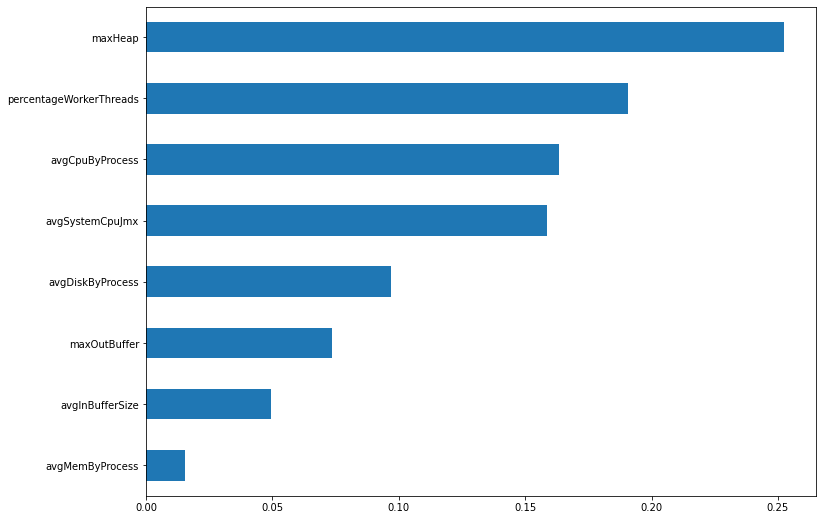

In [ ]:
#Check feature importance
feature_list=ras_metrics_training.columns
feat_importances = pd.Series(model.feature_importances_, index=feature_list)
feat_importances=feat_importances.sort_values()
feat_importances.plot(kind='barh',figsize=(12,9))

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
#    'max_depth': [80, 90, 100, 110],
    'max_features': [3,5,7],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [3, 5, 7,10],
    'n_estimators': [10, 30, 50]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


# Fit the grid search to the data
grid_search.fit(X_train,Y_train)
grid_search.best_params_


Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:   18.7s finished


{'bootstrap': True,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 50}

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, Y_Test)
print(grid_accuracy)

NameError: ignored

In [ ]:
from sklearn.linear_model import Lasso,LassoCV
from sklearn.model_selection import GridSearchCV   #Grid search for finding out the best package

lasso=Lasso(max_iter=50000)
parameters={'alpha': [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='r2',cv=5)
#lasso_regressor.fit(X_train,Y_train)

#model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)
best_grid_lasso=lasso_regressor.best_params_

print(lasso_regressor.best_params_)
print("R Squared value for the model",lasso_regressor.best_score_)

AttributeError: ignored

,averageExecutionTime,avgCpuByProcess,maxDiskByProcess,maxHeap,percentageWorkerThreads,avgInBufferSize,maxOutBuffer,avgMemByProcess,avgSystemCpuJmx
0,12966.0,0.112635,323020917,0.325,2.000000,0.000000,2.107,52.0,0.113167
1,12150.6,0.111258,323025606,0.342,2.000000,0.000000,4.040,52.0,0.110290
2,13150.4,0.173955,323030816,0.339,3.000000,0.200000,4.040,52.0,0.176758
3,13566.0,0.234493,323036547,0.321,4.285714,0.000000,3.027,52.0,0.234362
4,13694.4,0.257938,323042799,0.345,5.000000,0.000000,4.067,52.0,0.260198
...,...,...,...,...,...,...,...,...,...
996,20000.0,0.558756,1761229423,0.837,47.333333,1.833333,2.893,54.0,0.565922
997,20000.0,0.574492,1761565423,0.877,48.363636,0.000000,7.867,54.0,0.581556
998,20000.0,0.558932,1762065776,0.691,49.500000,0.000000,10.453,54.0,0.563848
999,20000.0,0.532185,1763885121,0.846,50.400000,0.000000,6.720,54.0,0.545469


In [ ]:
#Training data for the Logistic Regression
ras_metrics_training_LogReg =ras_metrics[['averageExecutionTime','avgCpuByProcess','maxDiskByProcess','maxHeap','percentageWorkerThreads','avgInBufferSize','maxOutBuffer','avgMemByProcess','avgSystemCpuJmx']]
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 3, labels=False)
ras_metrics_training_LogReg
#ras_metrics_training_LogReg


#ras_metrics_training_LogReg.describe()
#y


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,averageExecutionTime,avgCpuByProcess,maxDiskByProcess,maxHeap,percentageWorkerThreads,avgInBufferSize,maxOutBuffer,avgMemByProcess,avgSystemCpuJmx,quintile
0,12966.0,0.112635,323020917,0.325,2.000000,0.000000,2.107,52.0,0.113167,1
1,12150.6,0.111258,323025606,0.342,2.000000,0.000000,4.040,52.0,0.110290,0
2,13150.4,0.173955,323030816,0.339,3.000000,0.200000,4.040,52.0,0.176758,1
3,13566.0,0.234493,323036547,0.321,4.285714,0.000000,3.027,52.0,0.234362,1
4,13694.4,0.257938,323042799,0.345,5.000000,0.000000,4.067,52.0,0.260198,1
...,...,...,...,...,...,...,...,...,...,...
996,23613.8,0.558756,1761229423,0.837,47.333333,1.833333,2.893,54.0,0.565922,2
997,28846.6,0.574492,1761565423,0.877,48.363636,0.000000,7.867,54.0,0.581556,2
998,26835.6,0.558932,1762065776,0.691,49.500000,0.000000,10.453,54.0,0.563848,2
999,26957.4,0.532185,1763885121,0.846,50.400000,0.000000,6.720,54.0,0.545469,2


In [ ]:
y=ras_metrics_training_LogReg['quintile']

del ras_metrics_training_LogReg['averageExecutionTime']
del ras_metrics_training_LogReg['quintile']

X=ras_metrics_training_LogReg.iloc[:,:-1]
X=ras_metrics_training_LogReg
X_train,X_test,Y_train,Y_Test=train_test_split(X, y,test_size=0.2,random_state=1)

Model Accuracy
0.6965174129353234


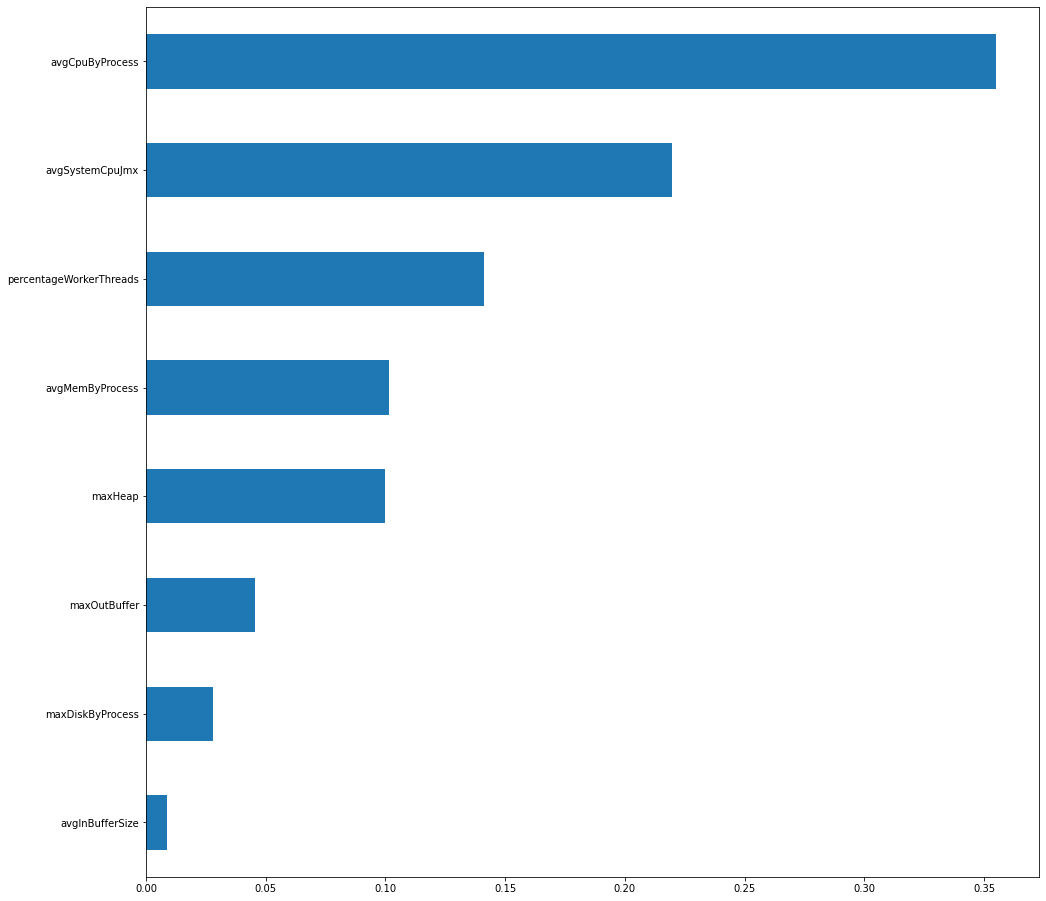

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=10,max_depth=4, random_state=0,min_samples_split=3)

#class_weight='balanced_subsample'
model_rf.fit(X_train,Y_train)#Fitting the model 

pred_rf=model_rf.predict(X_test)
pred_rf_proba=model_rf.predict_proba(X_test)

feat_importances = pd.Series(model_rf.feature_importances_, index=X_train.columns)
feat_importances=feat_importances.sort_values()
feat_importances.plot(kind='barh',figsize=(16,16))#Plotting feature importance

print('Model Accuracy')
print(model_rf.score(X_test,Y_Test))

In [ ]:
Y_pred = model_rf.predict(X_train)
n_correct = sum(Y_pred == Y_train)
print('Correct prediction #', n_correct/len(Y_train))

Correct prediction # 0.735


In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict
Y_CV_pred = cross_val_predict(model_rf, X_train, Y_train, cv=3)
precision_score(y_train_5, y_train_pred)

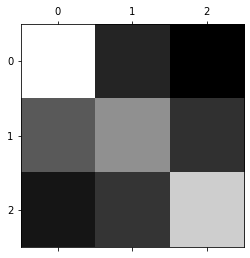

In [ ]:
#Error analysis
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
Y_train_pred = cross_val_predict(model_rf, X_train, Y_train, cv=3)
conf_mx = confusion_matrix(Y_train, Y_train_pred)
conf_mx
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

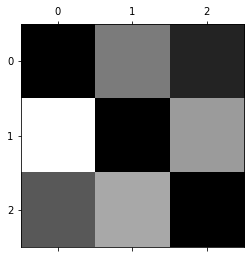

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()0000000000000000

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train,Y_train)
model_lr.score(X_train,Y_train)

from sklearn.metrics import roc_auc_score

Y_pred =model_lr.predict(X_train)
Y_pred
#roc_auc_score(Y_pred, Y_train)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,Y_train)
cross_val_score(sgd_clf, X_train, Y_train, cv=3, scoring="accuracy")
Y_pred = sgd_clf.predict(X_train)
n_correct = sum(Y_pred == Y_train)
print('Correct prediction #', n_correct/len(Y_train))

Correct prediction # 0.32875
